# Dataset from OpenML

In [3]:
import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset

pd.set_option('display.max_colwidth', None)
datalist = openml.datasets.list_datasets(output_format="dataframe")
datalist["%MinorityClass"] = datalist["MinorityClassSize"]/datalist["NumberOfInstances"]
datalist = datalist[["did", "name", "NumberOfInstances","NumberOfNumericFeatures","NumberOfFeatures","MinorityClassSize", "NumberOfClasses","%MinorityClass"]]
list_did = [41159,41158,44,1479,312,1486,1485,4134,41142,847,734,1471,994]
df_data_characteristic = datalist[datalist['did'].isin(list_did)]

In [35]:
### Characteris of dataset from OpenML
df_data_characteristic

,did,name,NumberOfInstances,NumberOfNumericFeatures,NumberOfFeatures,MinorityClassSize,NumberOfClasses,%MinorityClass
44,44,spambase,4601.0,57.0,58.0,1813.0,2.0,0.394045
312,312,scene,2407.0,294.0,300.0,431.0,2.0,0.179061
734,734,ailerons,13750.0,40.0,41.0,5828.0,2.0,0.423855
847,847,wind,6574.0,14.0,15.0,3073.0,2.0,0.467448
994,994,vehicle,846.0,18.0,19.0,218.0,2.0,0.257683
1471,1471,eeg-eye-state,14980.0,14.0,15.0,6723.0,2.0,0.448798
1479,1479,hill-valley,1212.0,100.0,101.0,606.0,2.0,0.500000
1485,1485,madelon,2600.0,500.0,501.0,1300.0,2.0,0.500000
1486,1486,nomao,34465.0,89.0,119.0,9844.0,2.0,0.285623
4134,4134,Bioresponse,3751.0,1776.0,1777.0,1717.0,2.0,0.457745


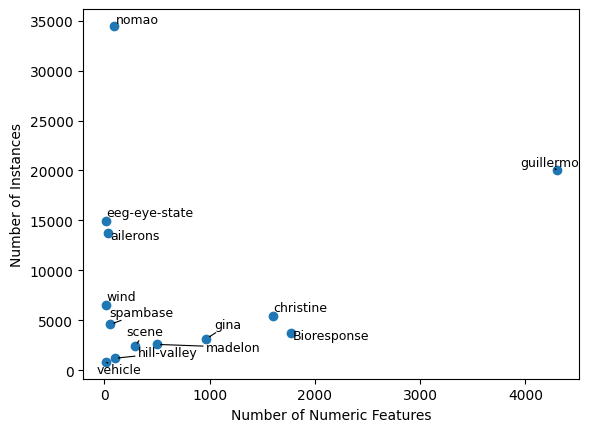

In [6]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scatter plot
plt.scatter(df_data_characteristic['NumberOfNumericFeatures'],df_data_characteristic['NumberOfInstances'])

# Collect texts first
texts = []
for i, row in df_temp_char.iterrows():
    texts.append(
        plt.text(row['NumberOfNumericFeatures'], row['NumberOfInstances'], str(row['name']), fontsize=9)
    )

# Adjust positions automatically
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black", lw=0.8))

plt.xlabel('Number of Numeric Features')
plt.ylabel('Number of Instances')
plt.show()

# Import Robust-CRAFG framework as a library

In [27]:
%load_ext autoreload
%autoreload 2
import nbimporter
import import_ipynb
import importlib
import RobustCRAFG as R_CRAFG
importlib.reload(R_CRAFG)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'RobustCRAFG' from 'RobustCRAFG.ipynb'>

# Select balance dataset from OpenML

In [8]:
##### Create table of data for experiment
import polars as pl

# Define schema
schema = {
    "DID": pl.Int64,
    "name": pl.Utf8,
    "skip_filter": pl.Utf8,
    "ratio_filter": pl.Float64,
    "skip_subsamp": pl.Utf8,
    "ratio_samp": pl.Float64
}

# Create empty DataFrame
df_list_data_para = pl.DataFrame(schema=schema)

list_data_para = [[734,'ailerons','Y',0.8,'Y',1]
,[847,'wind','Y',0.8,'Y',1]
,[1471,'eeg_eye_state','Y',0.8,'N',0.5]
,[41142,'christine','N',0.05,'N',0.5]
,[4134,'bioresponse','N',0.05,'N',0.5]
,[1485,'madelon','N',0.2,'N',0.5]
,[1479,'hill_valley','N',0.3,'Y',1]
,[41158,'gina','N',0.2,'N',0.5]
,[41159,'guillermo','N',0.03,'N',0.25]]

for data in list_data_para:
    df_list_data_para = df_list_data_para.vstack(pl.DataFrame([data],schema=schema))
    
df_list_data_para

DID,name,skip_filter,ratio_filter,skip_subsamp,ratio_samp
i64,str,str,f64,str,f64
734,"""ailerons""","""Y""",0.8,"""Y""",1.0
847,"""wind""","""Y""",0.8,"""Y""",1.0
1471,"""eeg_eye_state""","""Y""",0.8,"""N""",0.5
41142,"""christine""","""N""",0.05,"""N""",0.5
4134,"""bioresponse""","""N""",0.05,"""N""",0.5
1485,"""madelon""","""N""",0.2,"""N""",0.5
1479,"""hill_valley""","""N""",0.3,"""Y""",1.0
41158,"""gina""","""N""",0.2,"""N""",0.5
41159,"""guillermo""","""N""",0.03,"""N""",0.25


In [30]:
class packaged_generation:
    def __init__(self,name,percent_filter,flag,dict_data_df,df_meta,df_meta_feat,df_mi,df_centroid,running_time):
        self.data_name = name
        self.dict_data = dict_data_df
        self.portion_select_feat = percent_filter
        self.skip_select_feat = flag
        self.df_meta_data = df_meta
        self.df_meta_feature = df_meta_feat
        self.df_mi_table = df_mi 
        self.df_meta_centroid = df_centroid
        self.execution_time = running_time
    def display_info(self):
        print("Data : %s"%(self.data_name))
        print("Number of iteration : %s"%len(self.dict_data))
        print("Execution time : %s"%(self.execution_time))

# Generate feature with Robust-CRAFG framework on balance dataset

In [31]:
import openml
import pandas as pd
import polars as pl
from IPython.display import clear_output
from datetime import datetime

for row in df_list_data_para[:2].iter_rows():
    did = row[0]
    name = row[1]
    flag_filt = row[2]
    ratio_filt = row[3]
    flag_subs = row[4]
    ratio_subs = row[5]
    # Load dataset from OpenML by ID
    dataset = openml.datasets.get_dataset(did)  # DID of dataset
    # Get the data as a DataFrame
    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
    # Combine data into one pandas dataframe
    label = y.to_frame(name="label")
    df_pd_data = pd.concat([X,label],axis=1)
    # Convert from pandas dataframe to polars datframe
    df_polar_data = pl.DataFrame(df_pd_data)
    df_polar_data = df_polar_data.with_columns(df_polar_data["label"].to_physical().alias("label"))
    # Select only non categorical feature
    non_categorical_columns = [col for col, dtype in df_polar_data.schema.items() if dtype != pl.Categorical]
    df_polar_data = df_polar_data.select(non_categorical_columns)
    #### Put data into framework
    start = datetime.now()
    dict_data_generated,final_result_obj = R_CRAFG.robust_crafg(df_polar_data,'label',ratio_filt,flag_filt,5,flag_subs,ratio_subs)
    end = datetime.now()
    execute_time = end-start
    clear_output(wait=False)
    #########################################
    df_solution = final_result_obj.df_meta_data
    df_meta_feat = final_result_obj.df_meta_feature
    df_mi = final_result_obj.df_mi_table
    df_centroid = final_result_obj.df_meta_centroid
    obj_framework = packaged_generation(name,ratio_filt,flag_filt,dict_data_generated,df_solution,df_meta_feat,df_mi,df_centroid,execute_time)
    # Save to a file
#     file_path = r".......your path......\%s_output.pkl"%(name)
#     with open(file_path,"wb") as file:
#          pickle.dump(obj_framework,file)
    print("Object saved successfully!")

Object saved successfully!


In [ ]:
obj_framework.display_info()

# Select imbalance dataset from OpenML

In [34]:
##### Create table of data for experiment
import polars as pl

# Define schema
schema = {
    "DID": pl.Int64,
    "name": pl.Utf8,
    "skip_filter": pl.Utf8,
    "ratio_filter": pl.Float64,
    "skip_subsamp": pl.Utf8,
    "ratio_samp": pl.Float64
}

# Create empty DataFrame
df_list_data_imb_para = pl.DataFrame(schema=schema)

list_data_para_imb = [[44,'spambase','Y',0.8,'Y',1]
,[994,'vehicle','Y',0.8,'Y',1]
,[312,'scene','N',0.3,'Y',1]
,[734,'ailerons','Y',0.8,'N',0.3]    
,[1486,'nomao','Y',0.8,'N',0.1]
,[41159,'guillermo','N',0.03,'N',0.25]] 

for data in list_data_para_imb:
    df_list_data_imb_para = df_list_data_imb_para.vstack(pl.DataFrame([data],schema=schema))
    
df_list_data_imb_para

DID,name,skip_filter,ratio_filter,skip_subsamp,ratio_samp
i64,str,str,f64,str,f64
44,"""spambase""","""Y""",0.8,"""Y""",1.0
994,"""vehicle""","""Y""",0.8,"""Y""",1.0
312,"""scene""","""N""",0.3,"""Y""",1.0
734,"""ailerons""","""Y""",0.8,"""N""",0.3
1486,"""nomao""","""Y""",0.8,"""N""",0.1
41159,"""guillermo""","""N""",0.03,"""N""",0.25


In [36]:
class packaged_generation_imb:
    def __init__(self,name,percent_filter,flag,dict_data_df,df_meta,df_meta_feat,df_mi,df_centroid,running_time):
        self.data_name = name
        self.dict_data = dict_data_df
        self.portion_select_feat = percent_filter
        self.skip_select_feat = flag
        self.df_meta_data = df_meta
        self.df_meta_feature = df_meta_feat
        self.df_mi_table = df_mi 
        self.df_meta_centroid = df_centroid
        self.execution_time = running_time
    def display_info(self):
        print("Data : %s"%(self.data_name))
        print("Number of iteration : %s"%len(self.dict_data))
        print("Execution time : %s"%(self.execution_time))

In [37]:
import openml
import pandas as pd
import polars as pl
from IPython.display import clear_output
from datetime import datetime
import pickle

for row in df_list_data_imb_para[:2].iter_rows():
    did = row[0]
    name = row[1]
    flag_filt = row[2]
    ratio_filt = row[3]
    flag_subs = row[4]
    ratio_subs = row[5]
#     print(did,name,flag_filt,ratio_filt,flag_subs,ratio_subs)
    try:
        # Load dataset from OpenML by ID
        dataset = openml.datasets.get_dataset(did)  # DID of dataset
        # Get the data as a DataFrame
        X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
        # Combine data into one pandas dataframe
        label = y.to_frame(name="label")
        df_pd_data = pd.concat([X,label],axis=1)
        # Convert from pandas dataframe to polars datframe
        df_polar_data = pl.DataFrame(df_pd_data)
        df_polar_data = df_polar_data.with_columns(df_polar_data["label"].to_physical().alias("label"))
        # Select only non categorical feature
        non_categorical_columns = [col for col, dtype in df_polar_data.schema.items() if dtype != pl.Categorical]
        df_polar_data = df_polar_data.select(non_categorical_columns)
        #### Put data into framework
        start = datetime.now()
        dict_data_generated,final_result_obj = R_CRAFG.robust_crafg(df_polar_data,'label',ratio_filt,flag_filt,5,flag_subs,ratio_subs,'Y')
        end = datetime.now()
        execute_time = end-start
        clear_output(wait=False)
        #########################################
        df_solution = final_result_obj.df_meta_data
        df_meta_feat = final_result_obj.df_meta_feature
        df_mi = final_result_obj.df_mi_table
        df_centroid = final_result_obj.df_meta_centroid
        obj_framework = packaged_generation_imb(name,ratio_filt,flag_filt,dict_data_generated,df_solution,df_meta_feat,df_mi,df_centroid,execute_time)
        # Save to a file
#         file_path = r".......your path......\%s_output_imbalance.pkl"%(name)
#         with open(file_path,"wb") as file:
#              pickle.dump(obj_framework,file)
        print("Object saved successfully!")
    except Exception as e: 
          continue

Object saved successfully!


In [39]:
obj_framework.display_info()

Data : vehicle
Number of iteration : 5
Execution time : 0:00:11.586178
